# Imports

In [14]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Model load

In [15]:
sensor_name = 'qing_cheng'
# sensor_name = 'vallen'

model_index = 4

In [16]:
model_name_df = pd.read_csv('./Model_Index.csv')
model_name_df.index = model_name_df.index + 1

model_name = model_name_df['nome_do_arquivo'].loc[model_index] if (model_index > 0)  else 'TEST'

print(f'Model file name: {model_name}')
print(f'Model index: {model_index}')

Model file name: boolean_canal_2_ruido
Model index: 4


In [17]:
model = load_model(f'./model/{sensor_name}/{model_index}/{model_name}-best_model.h5')

In [18]:
X = np.load(f'./model/{sensor_name}/{model_index}/{model_name}-x.npy')
y = np.load(f'./model/{sensor_name}/{model_index}/{model_name}-y.npy')

# Model analysis

In [19]:
y_pred = model.predict(X)

313/313 [==============================] - 2s 5ms/step


In [20]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [21]:
conf_matrix = confusion_matrix(y, y_pred_classes)
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

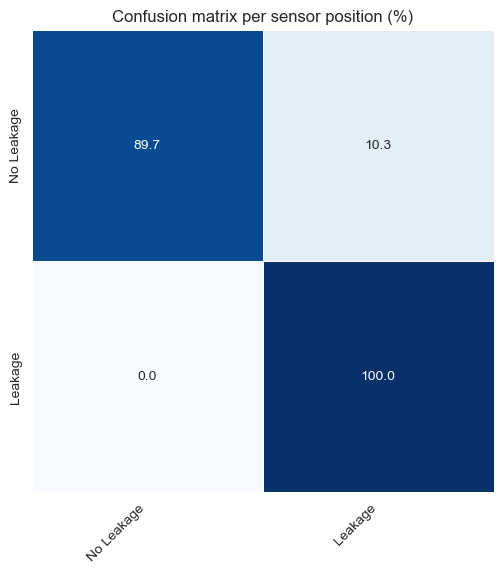

In [22]:
# class_labels = ['No Leakage', 'Leakage']
class_labels = ['No Leakage', 'Leakage in position 2', 'Leakage in position 3', 'Leakage in position 4']

if 1 <= model_index <= 4:
    class_labels = ['No Leakage', 'Leakage']
elif 4 < model_index <= 8:
    class_labels = ['No Leakage', 'Leakage in position 2', 'Leakage in position 3', 'Leakage in position 4']

conf_matrix_df = pd.DataFrame(conf_matrix_percent, index=class_labels, columns=class_labels)
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='.1f', cbar=False, square=True, linewidths=0.5)

# Rotate x-axis labels by 45 degrees
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

plt.title('Confusion matrix per sensor position (%)')
plt.show()

# ---

In [23]:
index = 420

In [24]:
y_1 = model.predict(
    np.array(
        [ X[index] ]
    )
)

1/1 [==============================] - 0s 17ms/step


In [25]:
y_1

array([[0.01259563, 0.98740435]], dtype=float32)

In [26]:
y[index]

1